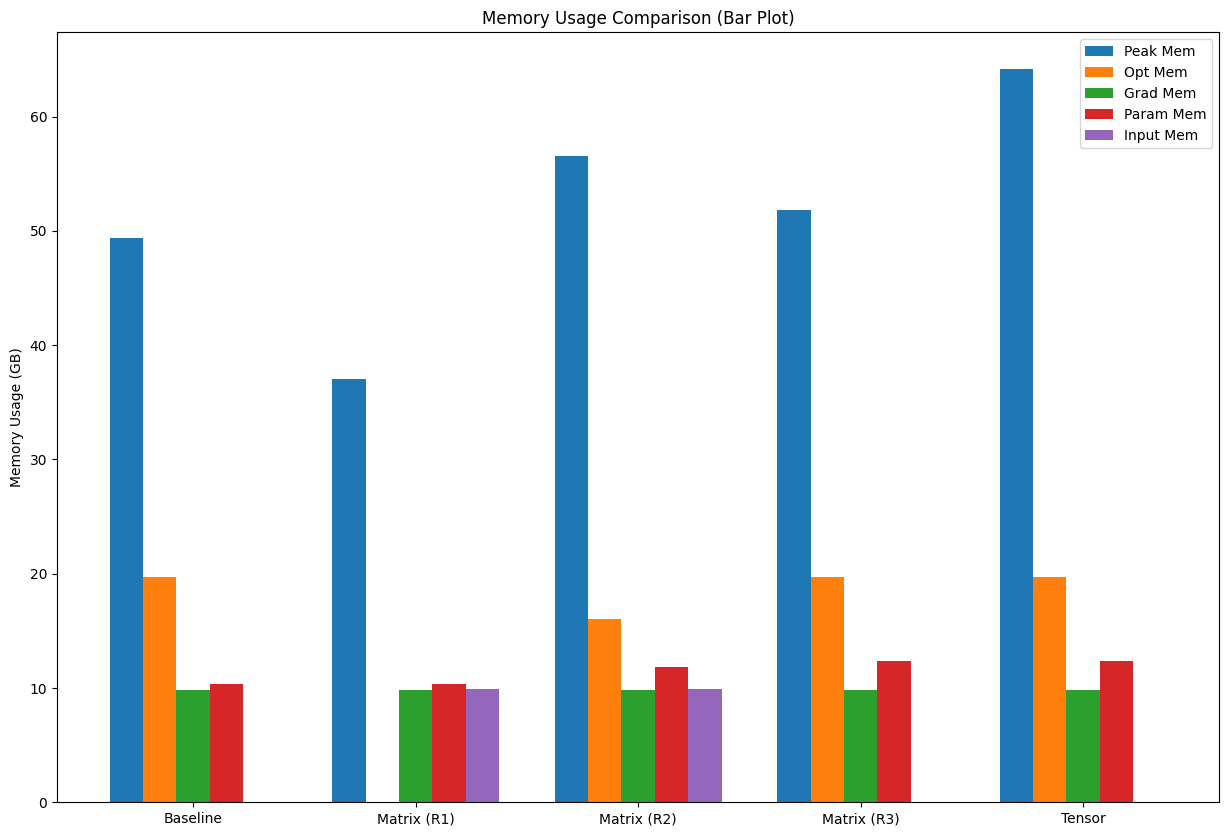

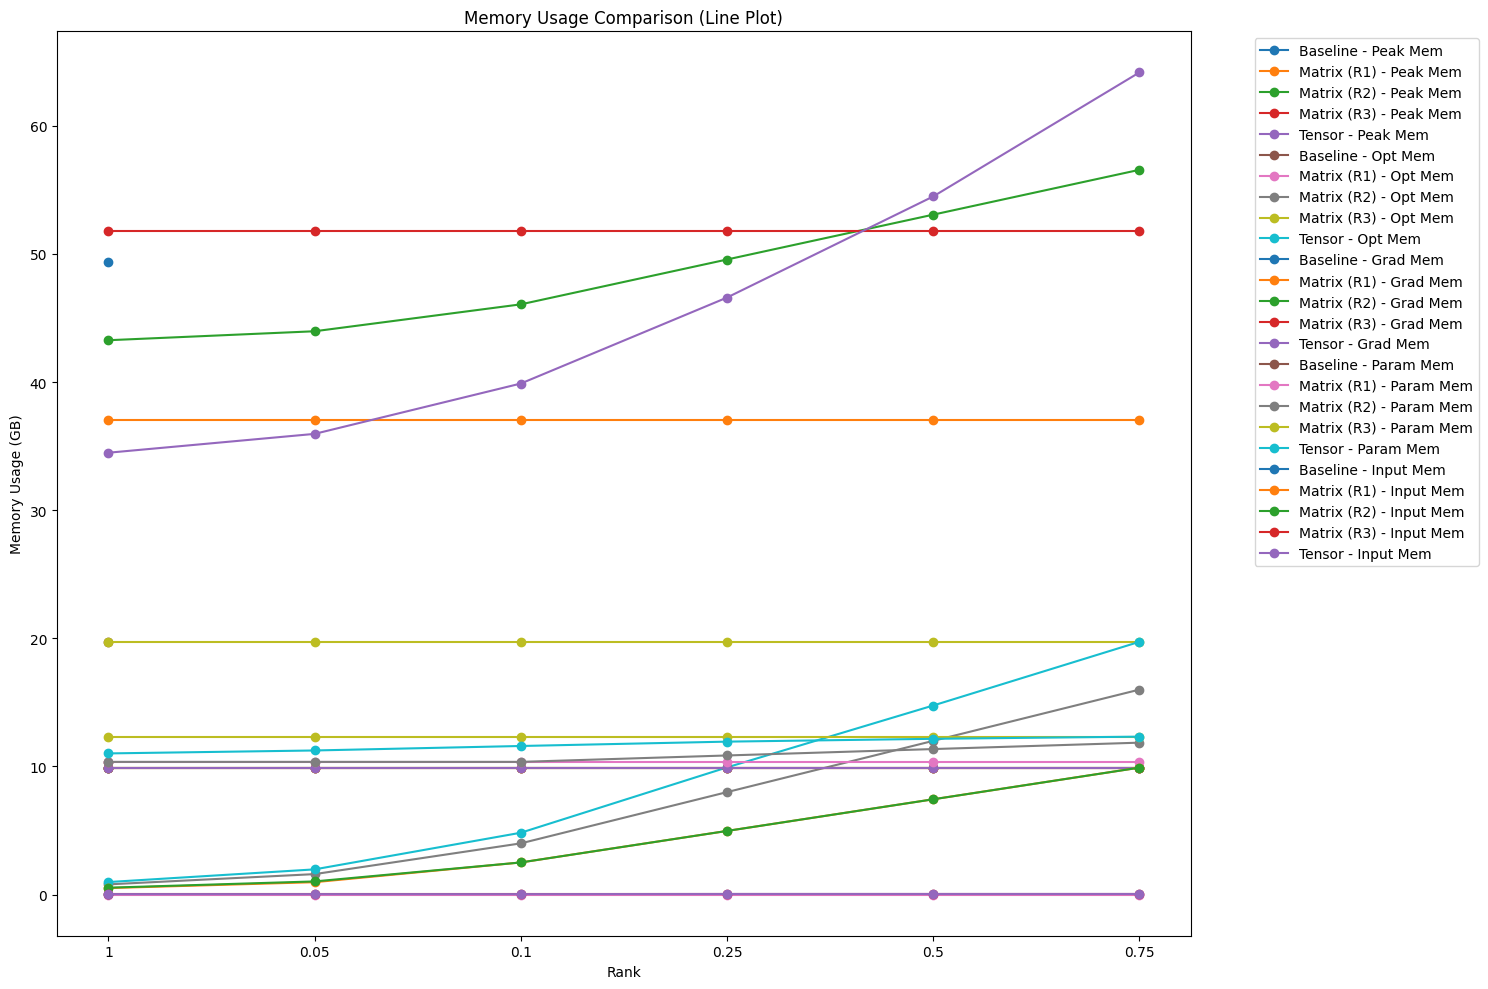

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Baseline', 'Matrix (R1)', 'Matrix (R2)', 'Matrix (R3)', 'Tensor']
ranks = ['1', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']

peak_mem = [
    [49.35],
    [37.04, 37.04, 37.04, 37.04, 37.04, 37.04],
    [43.27, 43.97, 46.07, 49.57, 53.07, 56.57],
    [51.82, 51.82, 51.82, 51.82, 51.82, 51.82],
    [34.49, 35.96, 39.89, 46.60, 54.49, 64.17]
]

opt_mem = [
    [19.73],
    [0.00, 0.00, 0, 0, 0, 0],
    [0.80, 1.60, 4.00, 8.00, 12.00, 16.00],
    [19.73, 19.73, 19.73, 19.73, 19.73, 19.73],
    [0.98, 1.97, 4.83, 9.93, 14.76, 19.73]
]

grad_mem = [
    [9.86],
    [9.86, 9.86, 9.86, 9.86, 9.86, 9.86],
    [9.86, 9.86, 9.86, 9.86, 9.86, 9.86],
    [9.86, 9.86, 9.86, 9.86, 9.86, 9.86],
    [9.86, 9.86, 9.86, 9.86, 9.86, 9.86]
]

param_mem = [
    [10.36],
    [10.36, 10.36, 10.36, 10.36, 10.36, 10.36],
    [10.36, 10.36, 10.36, 10.86, 11.36, 11.86],
    [12.33, 12.33, 12.33, 12.33, 12.33, 12.33],
    [11.02, 11.25, 11.60, 11.94, 12.16, 12.33]
]

input_mem = [
    [0.04],
    [0.51, 0.97, 2.51, 4.97, 7.44, 9.91],
    [0.54, 1.03, 2.51, 4.97, 7.44, 9.91],
    [0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
    [0.04, 0.04, 0.04, 0.05, 0.05, 0.05]
]

def plot_memory_usage(plot_type='bar'):
    fig, ax = plt.subplots(figsize=(15, 10))
    x = np.arange(len(models))
    width = 0.15
    
    for i, (mem_data, label) in enumerate(zip([peak_mem, opt_mem, grad_mem, param_mem, input_mem],
                                              ['Peak Mem', 'Opt Mem', 'Grad Mem', 'Param Mem', 'Input Mem'])):
        if plot_type == 'bar':
            ax.bar(x + i*width, [d[-1] for d in mem_data], width, label=label)
        else:  # line plot
            for j, model_data in enumerate(mem_data):
                ax.plot(ranks[:len(model_data)], model_data, marker='o', label=f'{models[j]} - {label}')

    ax.set_ylabel('Memory Usage (GB)')
    ax.set_title(f'Memory Usage Comparison ({plot_type.capitalize()} Plot)')
    
    if plot_type == 'bar':
        ax.set_xticks(x + width * 2)
        ax.set_xticklabels(models)
        ax.legend()
    else:
        ax.set_xlabel('Rank')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()

    plt.show()

# Generate both plots
plot_memory_usage('bar')
plot_memory_usage('line')